### Load results and plot learning curves

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import itertools

#### Load results for train on sim, test on sim and human



In [24]:
def load_results(model_name, train_seq_part, n_simulation_sequences_train, n_human_sequences_train, run_idx):
    to_save_folder = '/scratch/gpfs/erussek/RNN_project/preference_model_results_nov20'
    res_file_name = 'res_model_name_{}_train_seq_part_{}_n_simulation_sequences_train_{}_n_human_sequences_train_{}_job_{}.pickle'.format(model_name,train_seq_part, n_simulation_sequences_train, n_human_sequences_train, run_idx)
    res_full_file_name = os.path.join(to_save_folder, res_file_name)
    file = open(res_full_file_name, 'rb')
    res = pickle.load(file)
    return res

def load_results_all_runs(model_name, train_seq_part, n_simulation_sequences_train, n_human_sequences_train, n_runs = 7):
    
    results_list = []
    
    for run_idx in range(n_runs):
        res = load_results(model_name, train_seq_part, n_simulation_sequences_train, n_human_sequences_train, run_idx)
        results_list.append(res)
        
    return results_list

def get_learning_curve_train_sim_or_human(model_name, train_seq_part, n_simulation_sequences_train = int(1.75e6), n_human_sequences_train = 0, which_loss = 'simulation_loss_results', n_runs = 7):
    
    results_list = load_results_all_runs(model_name, train_seq_part, n_simulation_sequences_train, n_human_sequences_train, n_runs = n_runs)
    
    simulation_loss_results_by_run = np.array([res[which_loss] for res in results_list])
    
    return np.mean(simulation_loss_results_by_run, axis=0), np.std(simulation_loss_results_by_run, axis=0)/np.sqrt(n_runs), results_list[0]['train_sequence_number'], results_list[0]['human_sequence_number']
        
def get_correlation_results(model_name, train_seq_part, n_simulation_sequences_train = int(1.75e6), n_human_sequences_train = 0, which_r_sim = 'r_sim_by_n_back', n_runs = 10):
    
    # pct_correct_max_human_by_n_back
    
    #n_simulation_sequences_train = int(1.75e6)
    #n_human_sequences_train = 0
    
    results_list = load_results_all_runs(model_name, train_seq_part, n_simulation_sequences_train, n_human_sequences_train, n_runs = n_runs)
    
    r_by_n_back = np.array([res[which_r_sim] for res in results_list])
    
    return np.median(r_by_n_back, axis=0), np.std(r_by_n_back, axis=0)/np.sqrt(10)


#### Learning curves for fix + choice, train on simulated data, test on simulated / Human data

Text(0, 0.5, 'Human Test Data Mean Squared Error')

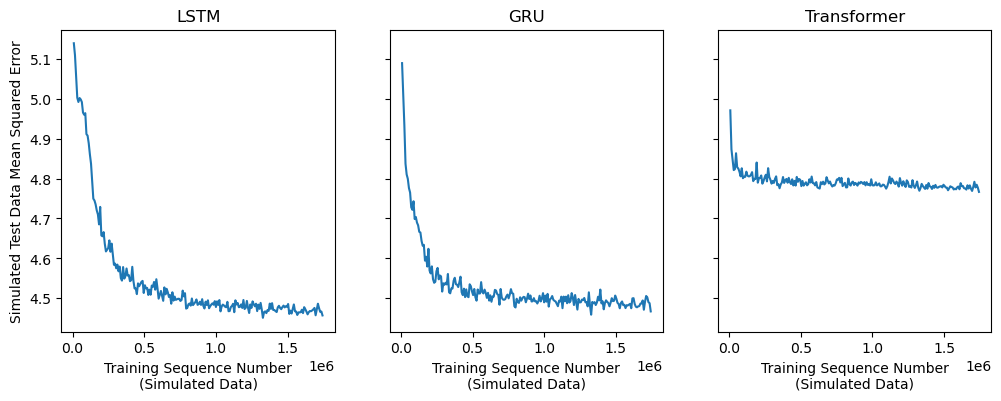

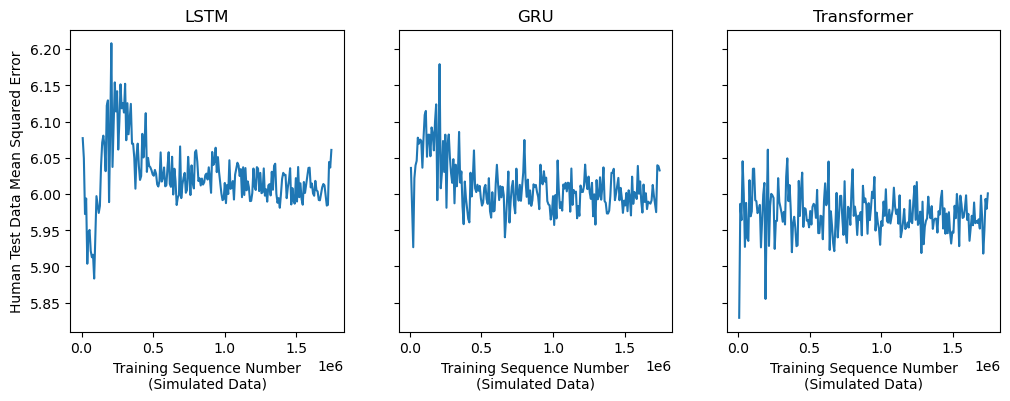

In [25]:
fig,ax = plt.subplots(1,3, figsize = (12,4), dpi = 100, sharex = True, sharey = True)

model_names = ["LSTM", "GRU", "Transformer"]
train_seq_part = 'fix_and_choice'

for model_idx, model_name in enumerate(model_names):

    mean_loss, sem_loss, train_sequence_number, _ = get_learning_curve_train_sim_or_human(model_name, train_seq_part)

    ax[model_idx].plot(train_sequence_number, mean_loss)
    ax[model_idx].set_xlabel('Training Sequence Number\n(Simulated Data)');
    ax[model_idx].set_title(model_name)

ax[0].set_ylabel('Simulated Test Data Mean Squared Error');

fix,ax = plt.subplots(1,3, figsize = (12,4), dpi = 100, sharex = True, sharey = True)

for model_idx, model_name in enumerate(model_names):

    mean_loss, sem_loss, train_sequence_number, _ = get_learning_curve_train_sim_or_human(model_name, train_seq_part, which_loss = 'human_loss_results')

    ax[model_idx].plot(train_sequence_number, mean_loss)
    ax[model_idx].set_xlabel('Training Sequence Number\n(Simulated Data)')
    ax[model_idx].set_title(model_name)

ax[0].set_ylabel('Human Test Data Mean Squared Error')
#fig.suptitle('Fixation + Choice')

#### Learning curves for fix_only train on simulated data, test on simulated / Human data

Text(0.5, 0.98, 'Fixation Only')

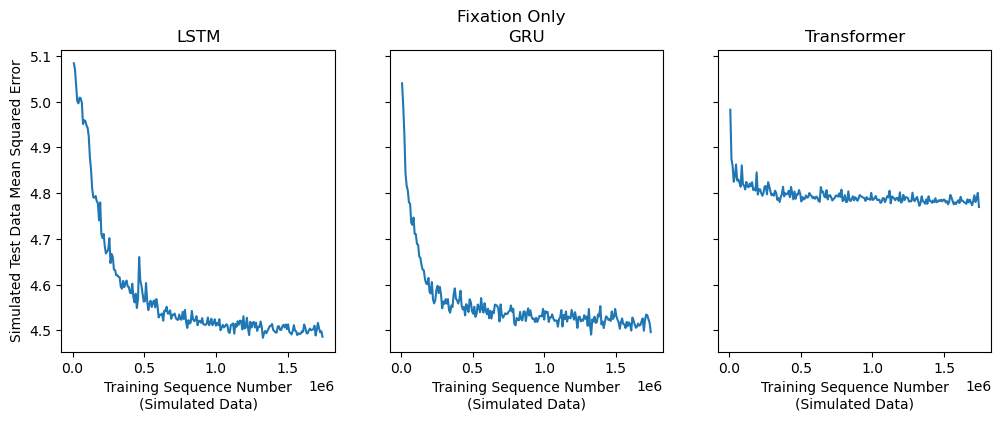

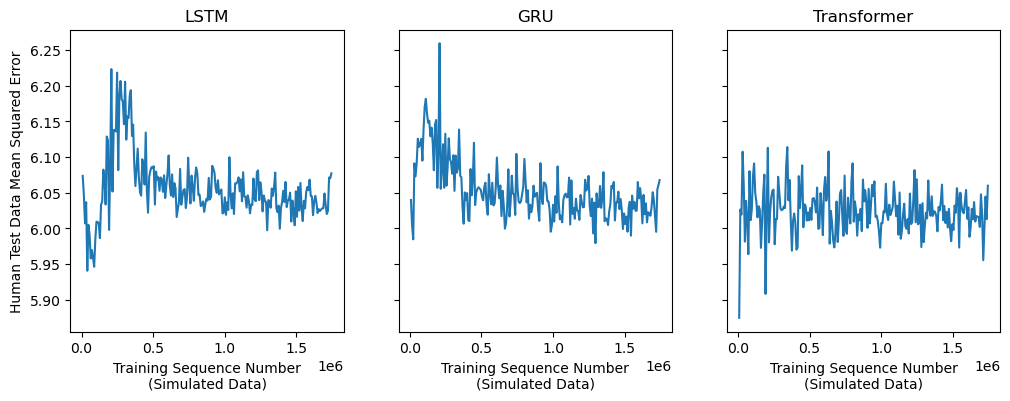

In [26]:
train_seq_part = 'fix_only'
fig,ax = plt.subplots(1,3, figsize = (12,4), dpi = 100, sharex = True, sharey = True)

for model_idx, model_name in enumerate(model_names):

    mean_loss, sem_loss, train_sequence_number, _ = get_learning_curve_train_sim_or_human(model_name, train_seq_part)

    ax[model_idx].plot(train_sequence_number, mean_loss)
    ax[model_idx].set_xlabel('Training Sequence Number\n(Simulated Data)');
    ax[model_idx].set_title(model_name)

ax[0].set_ylabel('Simulated Test Data Mean Squared Error');

fix,ax = plt.subplots(1,3, figsize = (12,4), dpi = 100, sharex = True, sharey = True)

for model_idx, model_name in enumerate(model_names):

    mean_loss, sem_loss, train_sequence_number, _ = get_learning_curve_train_sim_or_human(model_name, train_seq_part, which_loss = 'human_loss_results')

    ax[model_idx].plot(train_sequence_number, mean_loss)
    ax[model_idx].set_xlabel('Training Sequence Number\n(Simulated Data)')
    ax[model_idx].set_title(model_name)

ax[0].set_ylabel('Human Test Data Mean Squared Error')
fig.suptitle('Fixation Only')

#### Learning curves for choice only -- This is just MLP

Text(0, 0.5, 'Human Test Data Mean Squared Error')

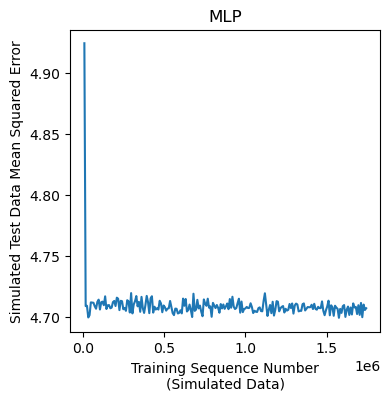

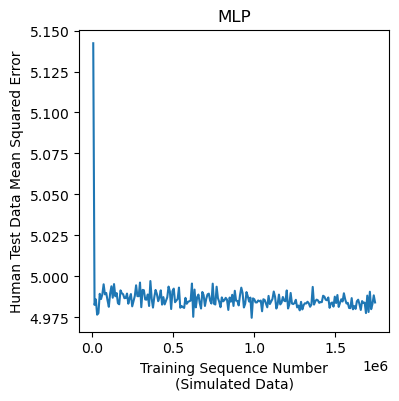

In [27]:
train_seq_part = 'choice_only'
model_name = 'MLP'
fig,ax = plt.subplots(1, figsize = (4,4), dpi = 100, sharex = True, sharey = True)

mean_loss, sem_loss, train_sequence_number, _ = get_learning_curve_train_sim_or_human(model_name, train_seq_part)

ax.plot(train_sequence_number, mean_loss)
ax.set_xlabel('Training Sequence Number\n(Simulated Data)');
ax.set_title(model_name)
ax.set_ylabel('Simulated Test Data Mean Squared Error')

# why did job 8 here fail?

fig,ax = plt.subplots(1, figsize = (4,4), dpi = 100, sharex = True, sharey = True)

mean_loss, sem_loss, train_sequence_number, _ = get_learning_curve_train_sim_or_human(model_name, train_seq_part, which_loss = 'human_loss_results')

ax.plot(train_sequence_number, mean_loss)
ax.set_xlabel('Training Sequence Number\n(Simulated Data)');
ax.set_title(model_name)
ax.set_ylabel('Human Test Data Mean Squared Error')

# why did job 8 here fail?

#### Load plot correlation reesults



r_sim_by_n_back
LSTM 0.6222359047588089
LSTM 0.46313842226240337
GRU 0.6179579391863688
GRU 0.4558103561425668
Transformer 0.5047598662147809
Transformer 0.36739717422166046

r_human_by_n_back
LSTM 0.4461929064472876
LSTM 0.18364096827581505
GRU 0.4512286361554716
GRU 0.18517462017575625
Transformer 0.46871572383559146
Transformer 0.23868538996403368
MLP  0.4689910934126249


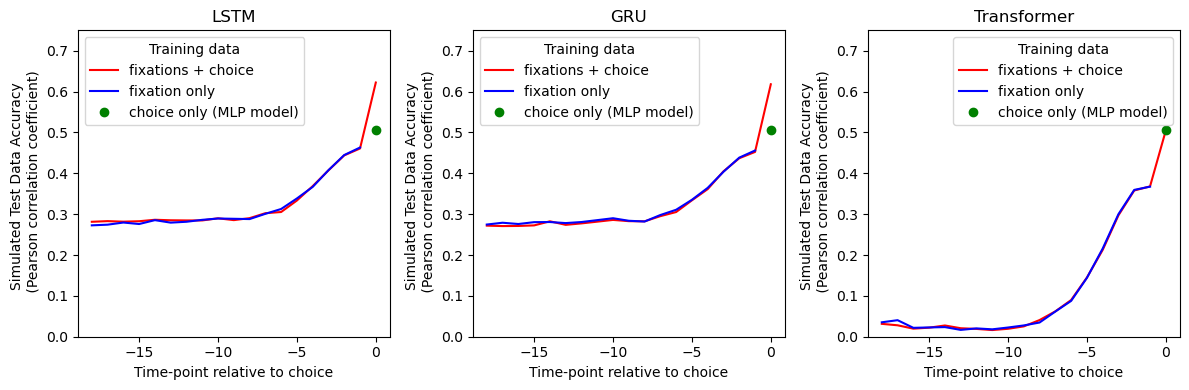

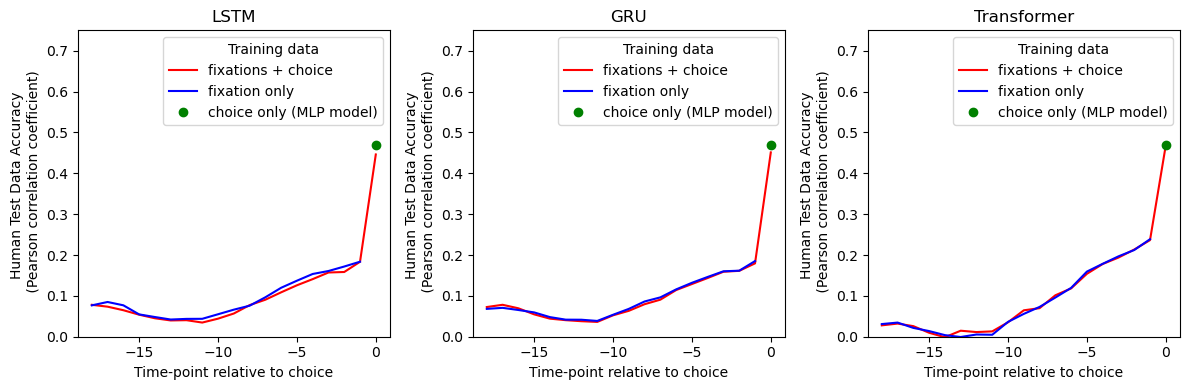

In [28]:
y_name = ['Simulated', 'Human']

for which_r_idx, which_r_sim in enumerate(['r_sim_by_n_back', 'r_human_by_n_back']):

    fix,ax = plt.subplots(1,3, figsize = (12,4), dpi = 100, layout = 'tight')
    print('')
    print(which_r_sim)

    for model_idx, model_name in enumerate(model_names):

        mn_r_by_n_back, sem_r_by_n_back = get_correlation_results(model_name, 'fix_and_choice', which_r_sim = which_r_sim, n_runs = 7)
        
        print(model_name, end = ' ')
        print(mn_r_by_n_back[0])
        
        these_tps = np.arange(-18,1,1)
        ax[model_idx].plot(these_tps,np.flip(mn_r_by_n_back), 'r-', label='fixations + choice')
        
        mn_r_by_n_back, sem_r_by_n_back = get_correlation_results(model_name, 'fix_only', which_r_sim = which_r_sim, n_runs = 7)
        print(model_name, end = ' ')
        print(mn_r_by_n_back[0])
        
        these_tps = np.arange(-18,0,1)
        ax[model_idx].plot(these_tps,np.flip(mn_r_by_n_back[:-1]), 'b-', label='fixation only')
        mn_r_by_n_back, sem_r_by_n_back = get_correlation_results('MLP', 'choice_only', which_r_sim = which_r_sim, n_runs = 7)
        ax[model_idx].plot(0,mn_r_by_n_back, 'go', label='choice only (MLP model)')
        ax[model_idx].set_ylabel('{} Test Data Accuracy \n (Pearson correlation coefficient)'.format(y_name[which_r_idx]))
        ax[model_idx].set_xlabel('Time-point relative to choice')
        ax[model_idx].legend(title='Training data')
        ax[model_idx].set_ylim(0,.75)
        ax[model_idx].set_title(model_name)

print("MLP " , mn_r_by_n_back)


### Analyze correct ordering performance

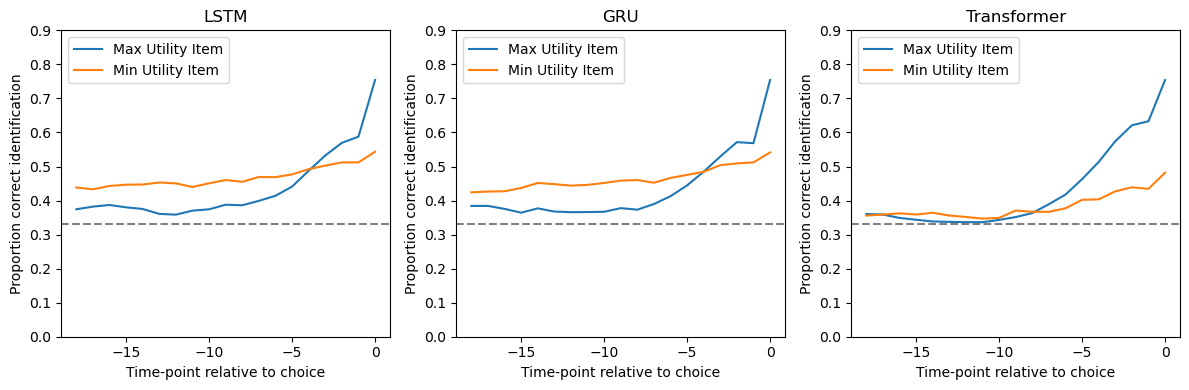

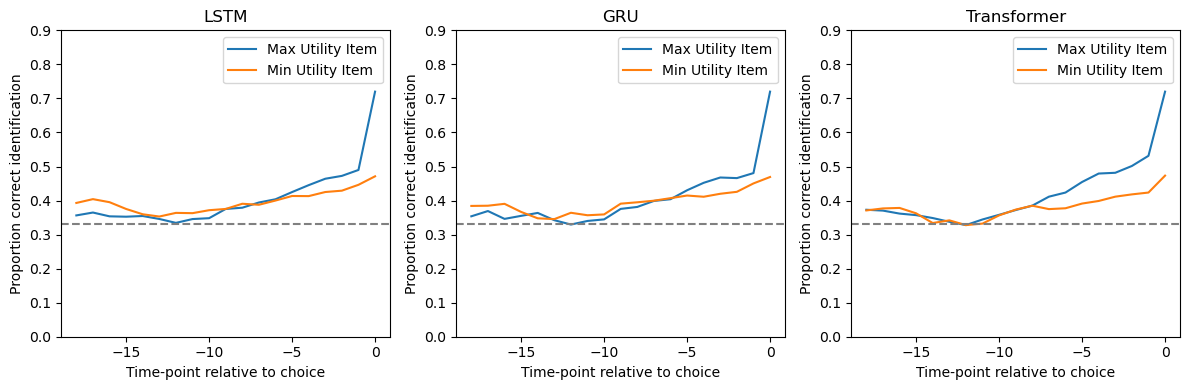

In [29]:
y_name = ['Simulated', 'Human']


fix,ax = plt.subplots(1,3, figsize = (12,4), dpi = 100, layout = 'tight')

labels = ['Max Utility Item', 'Min Utility Item', 'Full Item Order']

for which_r_idx, which_r_sim in enumerate(['pct_correct_max_sim_by_n_back', 'pct_correct_min_sim_by_n_back']):
    for model_idx, model_name in enumerate(model_names):

        mn_r_by_n_back, sem_r_by_n_back = get_correlation_results(model_name, 'fix_and_choice', which_r_sim = which_r_sim, n_runs = 7)
        
        these_tps = np.arange(-18,1,1)
        ax[model_idx].plot(these_tps,np.flip(mn_r_by_n_back), label=labels[which_r_idx])
        
        ax[model_idx].set_ylim(0,.9)

        
        ax[model_idx].set_ylabel('Proportion correct identification')
        ax[model_idx].set_xlabel('Time-point relative to choice')
        ax[model_idx].set_title(model_name)
for model_idx in range(3):
    ax[model_idx].axhline(y =.33, ls = '--', color = 'gray')
    ax[model_idx].legend()

        
fix,ax = plt.subplots(1,3, figsize = (12,4), dpi = 100, layout = 'tight')

labels = ['Max Utility Item', 'Min Utility Item', 'Full Item Order']

for which_r_idx, which_r_sim in enumerate(['pct_correct_max_human_by_n_back', 'pct_correct_min_human_by_n_back']):
    for model_idx, model_name in enumerate(model_names):

        mn_r_by_n_back, sem_r_by_n_back = get_correlation_results(model_name, 'fix_and_choice', which_r_sim = which_r_sim, n_runs = 7)
        
        these_tps = np.arange(-18,1,1)
        ax[model_idx].plot(these_tps,np.flip(mn_r_by_n_back), label=labels[which_r_idx])
        
        ax[model_idx].set_ylim(0,.9)

        ax[model_idx].legend()
        
        ax[model_idx].set_ylabel('Proportion correct identification')
        ax[model_idx].set_xlabel('Time-point relative to choice')
        ax[model_idx].set_title(model_name)

for model_idx in range(3):
    ax[model_idx].axhline(y =.33, ls = '--', color = 'gray')
    ax[model_idx].legend()


### Plot learning curves for pretrain and no pretrain to get best train numbers

No pretrain min loss: [5.746562127144106, 5.748737205997591, 5.752674625765893]
No pretrain num seqs: [108800, 108800, 67200]
Pretrain min loss: [5.727555978682734, 5.708428665130368, 5.739361361534365]
Pretrain num seqs: [179200, 179200, 22400]


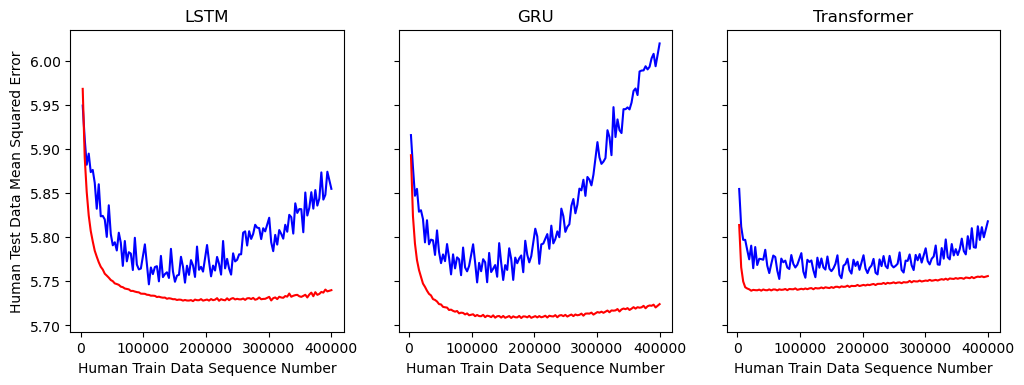

In [30]:
model_names = ["LSTM", "GRU", "Transformer"]
train_seq_part = 'fix_only'

fix,ax = plt.subplots(1,3, figsize = (12,4), dpi = 100, sharex = True, sharey = True)

#n_sim_seqs = np.array([0., 2e5], dtype=int)
#n_human_seqs = np.array([1.5e6, 1.5e6], dtype=int) # check this...

min_loss = []
best_train_number = []

for model_idx, model_name in enumerate(model_names):

    mean_loss, sem_loss, train_sequence_number, human_sequence_number = get_learning_curve_train_sim_or_human(model_name, train_seq_part, n_human_sequences_train = int(4e5), n_simulation_sequences_train = 0,  which_loss = 'human_loss_results', n_runs = 10)
    
    # get the train_sequence_number for each mean_loss
    min_loss.append(np.min(mean_loss))
    best_train_number.append(train_sequence_number[np.argmin(mean_loss)])
    
    ax[model_idx].plot(train_sequence_number, mean_loss, 'b-', label = 'no pretrain')
    # ax[model_idx].errorbar(train_sequence_number, mean_loss, sem_loss)
    ax[model_idx].set_xlabel('Training Sequence Number (Human Data)')
    ax[model_idx].set_title(model_name)

ax[0].set_ylabel('Human Test Data Mean Squared Error')
fig.suptitle('Fixation + Choice')
print('No pretrain min loss: {}'.format(min_loss))
print('No pretrain num seqs: {}'.format(best_train_number))

min_loss = []

best_train_number = []
for model_idx, model_name in enumerate(model_names):

    mean_loss, sem_loss, train_sequence_number, human_sequence_number = get_learning_curve_train_sim_or_human(model_name, train_seq_part, n_human_sequences_train = int(4e5), n_simulation_sequences_train = int(3e5), which_loss = 'human_loss_results', n_runs = 10)
    
    mean_loss = mean_loss[human_sequence_number > 0]
    human_sequence_number = human_sequence_number[human_sequence_number > 0]
    
    min_loss.append(np.min(mean_loss))
    best_train_number.append(human_sequence_number[np.argmin(mean_loss)])
    ax[model_idx].plot(human_sequence_number, mean_loss, 'r-', label = 'Pretrain')
    ax[model_idx].set_xlabel('Human Train Data Sequence Number')
    ax[model_idx].set_title(model_name)
    #ax[model_idx].set_ylim(5,7)

print('Pretrain min loss: {}'.format(min_loss))
print('Pretrain num seqs: {}'.format(best_train_number))

# might need to re-run this w/ less data and finer sampling... # something is going wrong with training on human data

### Get trained at peak

No pretrain min loss: [5.746562127144106, 5.748737205997591, 5.752674625765893]
No pretrain num seqs: [108800, 108800, 67200]
Pretrain min loss: [5.727555978682734, 5.708428665130368, 5.739361361534365]
Pretrain num seqs: [179200, 179200, 22400]


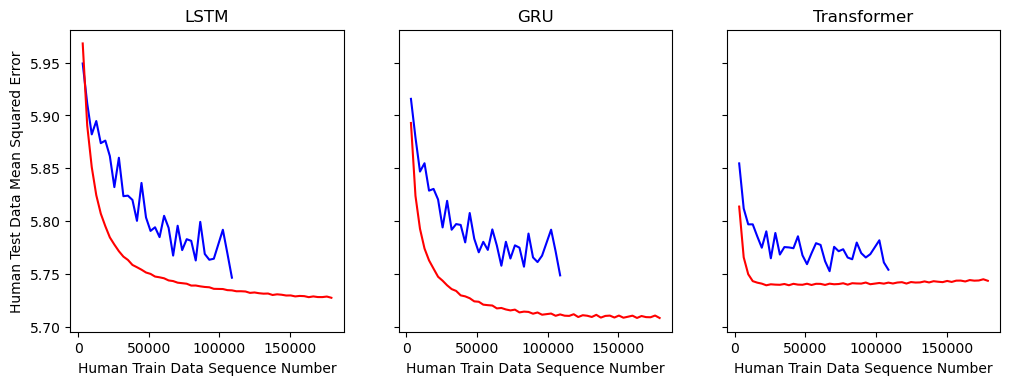

In [31]:
model_names = ["LSTM", "GRU", "Transformer"]
train_seq_part = 'fix_only'

fix,ax = plt.subplots(1,3, figsize = (12,4), dpi = 100, sharex = True, sharey = True)

#n_sim_seqs = np.array([0., 2e5], dtype=int)
#n_human_seqs = np.array([1.5e6, 1.5e6], dtype=int) # check this...

min_loss = []
best_train_number = []

for model_idx, model_name in enumerate(model_names):

    mean_loss, sem_loss, train_sequence_number, human_sequence_number = get_learning_curve_train_sim_or_human(model_name, train_seq_part, n_human_sequences_train = int(108800), n_simulation_sequences_train = 0,  which_loss = 'human_loss_results', n_runs = 10)
    
    
    # get the train_sequence_number for each mean_loss
    min_loss.append(np.min(mean_loss))
    best_train_number.append(train_sequence_number[np.argmin(mean_loss)])
    
    ax[model_idx].plot(train_sequence_number, mean_loss, 'b-', label = 'no pretrain')
    # ax[model_idx].errorbar(train_sequence_number, mean_loss, sem_loss)
    ax[model_idx].set_xlabel('Training Sequence Number (Human Data)')
    ax[model_idx].set_title(model_name)

ax[0].set_ylabel('Human Test Data Mean Squared Error')
fig.suptitle('Fixation + Choice')
print('No pretrain min loss: {}'.format(min_loss))
print('No pretrain num seqs: {}'.format(best_train_number))

min_loss = []

best_train_number = []
for model_idx, model_name in enumerate(model_names):

    mean_loss, sem_loss, train_sequence_number, human_sequence_number = get_learning_curve_train_sim_or_human(model_name, train_seq_part, n_human_sequences_train = int(179200), n_simulation_sequences_train = int(3e5), which_loss = 'human_loss_results', n_runs = 10)
    
    mean_loss = mean_loss[human_sequence_number > 0]
    human_sequence_number = human_sequence_number[human_sequence_number > 0]
    
    min_loss.append(np.min(mean_loss))
    best_train_number.append(human_sequence_number[np.argmin(mean_loss)])
    ax[model_idx].plot(human_sequence_number, mean_loss, 'r-', label = 'Pretrain')
    ax[model_idx].set_xlabel('Human Train Data Sequence Number')
    ax[model_idx].set_title(model_name)
    #ax[model_idx].set_ylim(5,7)

print('Pretrain min loss: {}'.format(min_loss))
print('Pretrain num seqs: {}'.format(best_train_number))

# might need to re-run this w/ less data and finer sampling... # something is going wrong with training on human data


r_human_by_n_back
LSTM 0.4794482527243692
LSTM 0.256077190752821
GRU 0.4761475876898164
GRU 0.24705741267264783
Transformer 0.46835079135224067
Transformer 0.23121219536648785
MLP  0.4698414586627555


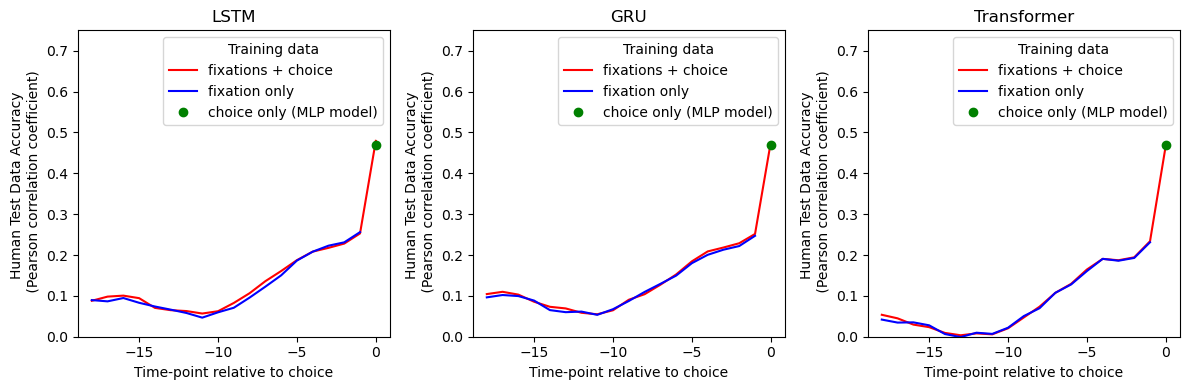

In [32]:
y_name = ['Human']

n_sim_seqs = np.array([0., 3e5], dtype=int)
n_human_seqs = np.array([108800, 179200], dtype=int) # check this...

for which_r_idx, which_r_sim in enumerate(['r_human_by_n_back']):

    fix,ax = plt.subplots(1,3, figsize = (12,4), dpi = 100, layout = 'tight')
    print('')
    print(which_r_sim)

    for model_idx, model_name in enumerate(model_names):

        mn_r_by_n_back, sem_r_by_n_back = get_correlation_results(model_name, 'fix_and_choice', n_simulation_sequences_train = n_sim_seqs[1], n_human_sequences_train = n_human_seqs[1], which_r_sim = 'r_human_by_n_back', n_runs = 10)
        
        print(model_name, end = ' ')
        print(mn_r_by_n_back[0])
        
        these_tps = np.arange(-18,1,1)
        ax[model_idx].plot(these_tps,np.flip(mn_r_by_n_back), 'r-', label='fixations + choice')
        
        mn_r_by_n_back, sem_r_by_n_back = get_correlation_results(model_name, 'fix_only', n_simulation_sequences_train = n_sim_seqs[1], n_human_sequences_train = n_human_seqs[1], which_r_sim = 'r_human_by_n_back', n_runs = 10)
        print(model_name, end = ' ')
        print(mn_r_by_n_back[0])
        
        these_tps = np.arange(-18,0,1)
        ax[model_idx].plot(these_tps,np.flip(mn_r_by_n_back[:-1]), 'b-', label='fixation only')
        mn_r_by_n_back, sem_r_by_n_back = get_correlation_results('MLP', 'choice_only', n_simulation_sequences_train = n_sim_seqs[1], n_human_sequences_train = n_human_seqs[1], which_r_sim = 'r_human_by_n_back', n_runs = 10)
        ax[model_idx].plot(0,mn_r_by_n_back, 'go', label='choice only (MLP model)')
        ax[model_idx].set_ylabel('{} Test Data Accuracy \n (Pearson correlation coefficient)'.format(y_name[which_r_idx]))
        ax[model_idx].set_xlabel('Time-point relative to choice')
        ax[model_idx].legend(title='Training data')
        ax[model_idx].set_ylim(0,.75)
        ax[model_idx].set_title(model_name)

print("MLP " , mn_r_by_n_back)

#### Get correlation for each, traned at best values...


LSTM
Human only 0.24463634135481388
pretrain 0.2527630641773146
sim_only 0.18545623078850193

GRU
Human only 0.2598719914338943
pretrain 0.2515425659221181
sim_only 0.18643486986153082

Transformer
Human only 0.2301301315824005
pretrain 0.2337384382719918
sim_only 0.23820868745276585


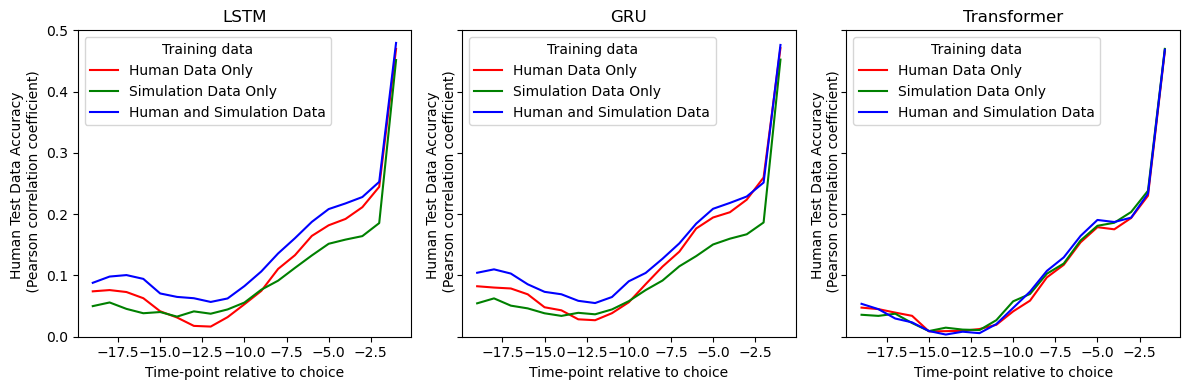

In [41]:
fig,ax = plt.subplots(1,3, figsize = (12,4), dpi = 100, layout = 'tight', sharex = True, sharey = True)

n_sim_seqs = np.array([0., 3e5], dtype=int)
n_human_seqs = np.array([108800, 179200], dtype=int) # check this...

train_seq_part = 'fix_and_choice'
train_seq_name = ''

model_names = ["LSTM", "GRU", "Transformer"]

for model_idx, model_name in enumerate(model_names):
    
    print('')
    print(model_name)

    no_pretrain_mn_r_by_n_back, _ = get_correlation_results(model_name, train_seq_part, n_simulation_sequences_train = n_sim_seqs[0], n_human_sequences_train = n_human_seqs[0], which_r_sim = 'r_human_by_n_back', n_runs = 10)
    print('Human only', no_pretrain_mn_r_by_n_back[1])

    pretrain_mn_r_by_n_back, _ = get_correlation_results(model_name, train_seq_part, n_simulation_sequences_train = n_sim_seqs[1], n_human_sequences_train = n_human_seqs[1], which_r_sim = 'r_human_by_n_back', n_runs = 10)
    print('pretrain', pretrain_mn_r_by_n_back[1])

    
    sim_only_r_by_n_back, _ = get_correlation_results(model_name, train_seq_part, which_r_sim = 'r_human_by_n_back', n_runs = 10)
    
    print('sim_only', sim_only_r_by_n_back[1])
    
    these_tps = np.arange(-19,0,1)
    ax[model_idx].plot(these_tps,np.flip(no_pretrain_mn_r_by_n_back), 'r-', label='Human Data Only')
    ax[model_idx].plot(these_tps,np.flip(sim_only_r_by_n_back), 'g-', label='Simulation Data Only')
    ax[model_idx].plot(these_tps,np.flip(pretrain_mn_r_by_n_back), 'b-', label='Human and Simulation Data')
    
    ax[model_idx].set_ylabel('{} Test Data Accuracy \n (Pearson correlation coefficient)'.format(y_name[which_r_idx]))
    ax[model_idx].set_xlabel('Time-point relative to choice')
    ax[model_idx].legend(title='Training data')
    ax[model_idx].set_ylim(0,.5)
    ax[model_idx].set_title(model_name)
    
# fig.suptitle('Train on {}'.format(train_seq_name))
